# Python Project: Disease Prediction using Supervised ML

## Introduction

In this notebook, I will explore and implement different machine learning models on a patient record dataset that contains symptoms and prognosis. The purpose of this project is to demonstrate how to train these different machine learning models so that it can be used to predict diseases based on a patient symptoms.

This project will be broken down into several sections, each focusing on a key aspect of the process. We will begin with loading and cleaning the data, followed by visualizing it to gain insights. Depending on the nature of the project, we might apply various algorithms, build predictive models, or perform complex calculations.

Throughout this notebook, I will be using Python 3.12 as well as leverage important Python libraries such as Numpy, SciPy, Matplotlib and Sci-kit Learn. This will help streamline the process and provide powerful tools for data manipulation and analysis.

The project is structured as follows:

1. **Data Loading and Preprocessing**: Import the necessary datasets and clean the data.
2. **Visualisation**: Visualise dataset and result.
3. **Modeling and Further Analysis**: Apply any models or perform additional analysis.
4. **Conclusion**: Summarize the findings and next steps.

### Models Used

In this project, we will be using the following models to analyze the data and draw insights:

1. **Support Vector Machine**:
   - **Type**: Classification, Regression, Outlier Detection
   - **Description**: [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) (SVM) are a set of methods used for classification, regression and outliers detection. As you may have guessed, I will use the classification model or SVC. It is capable of performing binary and multi-class classification on a dataset. It takes two input arrays. The first has shape (n_samples, n_features) which holds the training samples, the second array has shape (n_samples) holding the class label. After both inputs are fitted, it can be used to predict new values. It essentially finds the optimal hyperplane in an N-dimensional space to separate data points into different classes. The algorithm maximizes the margin between the closest points of different classes. More info can about SVM can be found [here](https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=gcse_outind).

2. **Naive Bayes Classifier**:
   - **Type**: Probabilistic classifier
   - **Description**: A ML algorithm used for classification tasks and it does this using Bayes' Theorem to find probabilities and by assuming the presence of one feature does not affect other features, hence the use of the word "Naive". In sci-kit learn there are a few different Naive Bayes Classifier to choose from. For this project I will use the [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) which assumes the likelihood of the features to be Gaussian. More infomation can be found [here](https://www.geeksforgeeks.org/naive-bayes-classifiers/).

3. **Random Forest Classifier**:
   - **Type**: Classification, Regression, Decision Tree, Ensemble Technique
   - **Description**: A set of decision trees from a randomly selected subset of the training set. It uses these sets of decision trees for a majority voting to decide on a final prediction. Random Forest Classification is an ensemble learning technique designed to enhance the accuracy and robustness of classification tasks. How it creates these subsets of decision trees is defined by employing a technique called bagging (Bootstrap Aggregating). This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers. The sci-kit page for this model can be found [here](https://scikit-learn.org/stable/modules/ensemble.html#forest) as well as a beginner friendly introduction [here](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/?ref=gcse_outind).


For more details on the specific project dependencies, versions and dataset, visit my GitHub repository: [https://github.com/ISectionU/Disease-Prediction-Using-ML](https://github.com/ISectionU/Disease-Prediction-Using-ML).

In [1]:
# Importing libraries to be used
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

## Data Loading and Preprocessing + Visualisation

The dataset has already been downloaded prior starting this project. Details on where to acqquire the dataset used can be found in my project repo. Before beginning any analysis on the data, I load the dataset and inspect the structure of it.

### Reading the Data

In [2]:
# set max rows and columns I want to see as the csv file is large
pd.set_option('display.max_rows', 6) 
pd.set_option('display.max_columns',5)
csvDataset = pd.read_csv('Dataset/dataset.csv') 
print(csvDataset)

      itching  skin_rash  ...                prognosis  Unnamed: 133
0           1          1  ...         Fungal infection           NaN
1           0          1  ...         Fungal infection           NaN
2           1          0  ...         Fungal infection           NaN
...       ...        ...  ...                      ...           ...
4917        0          0  ...  Urinary tract infection           NaN
4918        0          1  ...                Psoriasis           NaN
4919        0          1  ...                 Impetigo           NaN

[4920 rows x 134 columns]


Last column is a null column, this will have to be removed. When training models, it is important to determine if our target column is balanced or not. In this case, the prognosis column. Imbalanced datasets is when there's a majority class whist at the same time a underrepresented class in the dataset (the minority class). This presents challenges for predictive modeling as a model can become biased towards certain predictions, that result in a high percentage of accurate predictions, but poor overall performance.

Balancing a dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. In other words, the model will no longer favor the majority class just because it contains more data.

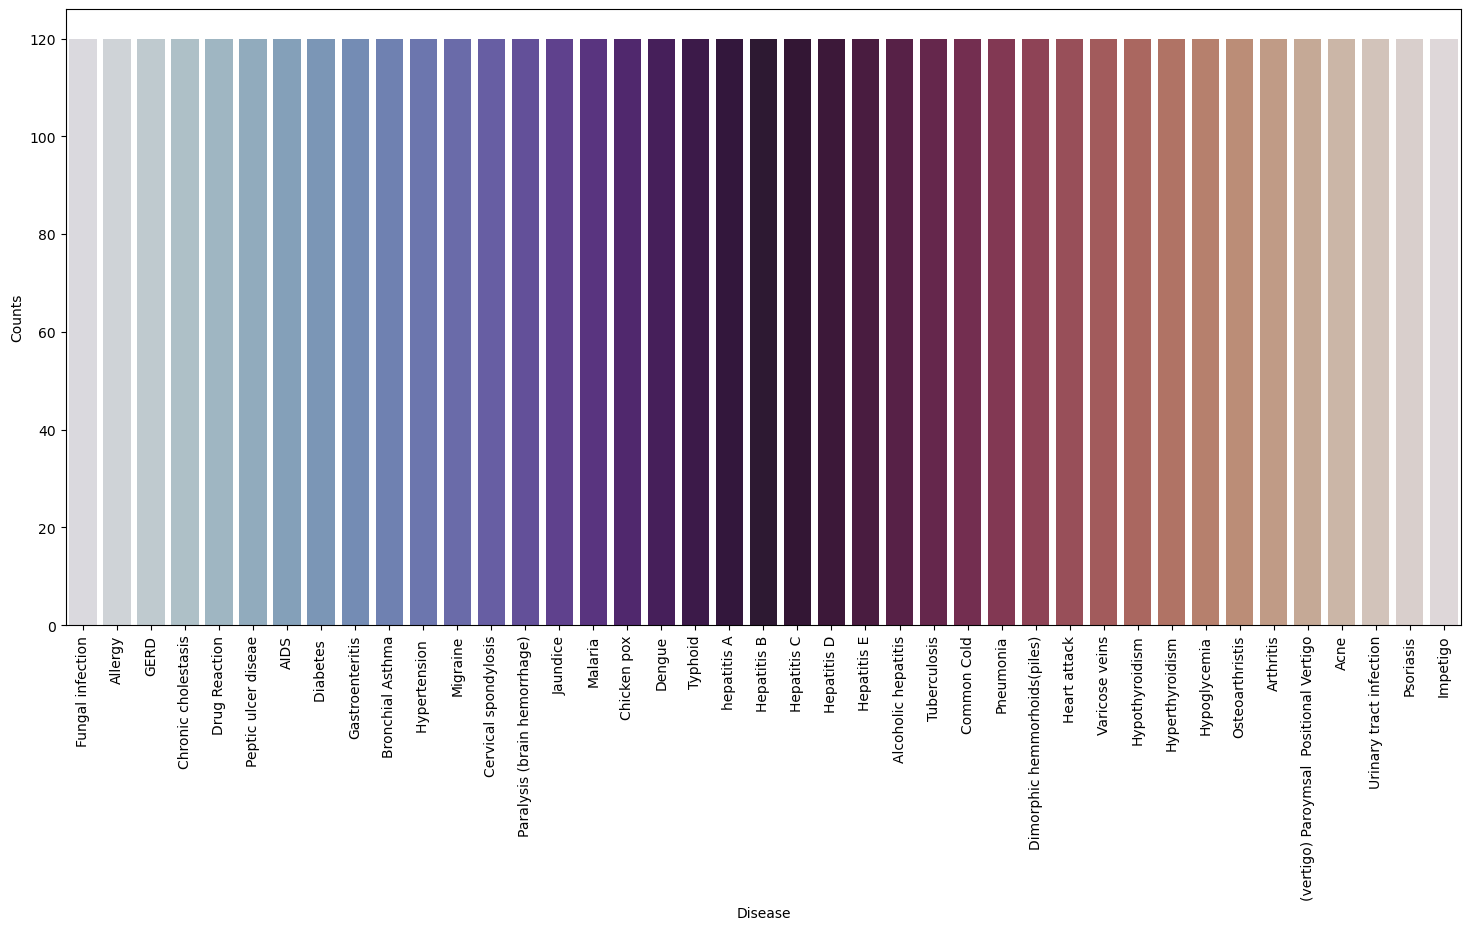

In [3]:
# Removing null column and checking whether the dataset 
# is balanced or not
csvDataset = pd.read_csv('Dataset/dataset.csv').dropna(axis = 1)

# Counting the number of occurrences of each unique value in the 
# prognosis column. It returns a pandas Series object, where each unique 
# value is an index label and its count is the corresponding value
disease_counts = csvDataset["prognosis"].value_counts() 

# Create a dataframe (df) object from disease_counts
temp_df = pd.DataFrame({
    'Disease': disease_counts.index, 
    'Counts': disease_counts.values
})

# plotting
plt.figure(figsize = (18,8))
sns.barplot(data = temp_df, x = 'Disease', y = 'Counts',
            hue = 'Disease',
            palette='twilight')
plt.xticks(rotation=90)
plt.show()

There is exactly 120 samples for each disease meaning balancing the dataset is not required. The target column (prognosis) is a object type therefore not suitable to train a machine learning model. I will be using a label encoder to convert the prognosis column to the numerical datatype. Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

In [4]:
# Encoding the target value into numerical
# value using LabelEncoder()
csvDataset["prognosis"] = LabelEncoder().fit_transform(csvDataset["prognosis"])
print(csvDataset["prognosis"])

0       15
1       15
2       15
        ..
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64


I can check whether the dataset has now been replaced with the encoder as follows:

In [5]:
print(csvDataset)

      itching  skin_rash  ...  yellow_crust_ooze  prognosis
0           1          1  ...                  0         15
1           0          1  ...                  0         15
2           1          0  ...                  0         15
...       ...        ...  ...                ...        ...
4917        0          0  ...                  0         38
4918        0          1  ...                  0         35
4919        0          1  ...                  1         27

[4920 rows x 133 columns]


As you can see, the prognosis column values has been replaced with their respective encoder values.

### Splitting Dataset

The dataset has been inspected and cleaned. I also converted the prognosis labels to numerical format. Now I will split the data to train and test the different models. I will be splitting the data into 80:20 format i.e. 80% of the dataset will be used for training the model and 20% of the data will be used to evaluate the performance of the models.

In [6]:
X_sym = csvDataset.iloc[:,:-1] # for alternative way use: data.iloc[:,0:132]
y_prog = csvDataset.iloc[:,-1] # for alternative way use: data.iloc[:,132]

X_train, X_test, y_train, y_test = train_test_split(
    X_sym, y_prog, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


### Modeling and Further Analysis

Different models have varying in-built parameters that can affect the models performance on data. Learning the parameters of a model (prediction function) and testing it on the same data leads to overfitting: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. To solve this, in supervised ML, it is common practice to fit the model on a '***train set***' after which evaluation is done on the '***validation set***' (seeing how well the model performs). When modelling seems to reach a desired accuracy, final evaluation can be done on the '***test set***'. 

As you may be wondering, didn't I already split the dataset in a train and test set? Yes, but to evaluate the ML models I would have to partition the available data into three sets, drastically reducing the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. So there is a bigger problem to solve; how can I evaluate my models wihtout partitioning the dataset into even smaller sets?

The answer is to follow a procedure called cross-validation (CV for short). Below is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

<img src="cv_diagram.png" style="margin:auto" width="600" height="340" alt="alt text">

To be more specific, I will be using K-Fold cross-validation (K-Fold CV) to evaluate the machine-learning models mentioned earlier. It is supported by the sci-kit learn module under the cross_val_score function. It goes as follows:

> ***K-Fold Cross-Validation***:
> 
>    1. Training set is split into $k$ smaller sets.
>    2. A model is trained using $k-1$ of the folds (subsets) as training data.
>    3. The resulting model is validated on the remaining part of the data, i.e the $k^{th}$ subset is used as a test set to compute a performance measure such as accuracy.
>    4. Repeat this until all subsets are evaluated.

<img src="kfolds_diagram.png" style="margin:auto" width="600" height="340" alt="alt text">

The cross_val_score function requires the model to be used, the training data and a scoring function which I will be defining as cv_scoring. 

In [7]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X_features, y_target):
    return accuracy_score(y_target, estimator.predict(X_features)) # Returns the fraction of correctly classified samples                                                               

In [8]:
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
# Producing cross validation score for the models:
#    - Model (m) is selected and fitted on X_train and y_train.
#    - cv = 10 means 10 k-folds chosen => 10 subsets created.
#    - cv_scoring function chosen the scoring parameter for cross_val_score. Scoring parameter accepts string or callabe object/function
#      with signature scorer(estimator, X, y) which should return only a single value.
for model_name in models:
    m = models[model_name]
    scores = cross_val_score(m, X_train, y_train, cv = 10,  
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


All models score an average of 1.0 meaning they are performing very well. To build a robust model we can combine i.e. take the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one. This approach will help us to keep the predictions much more accurate on completely unseen data. In the below code we will be training all the three models on the train data, checking the quality of our models using a confusion matrix, and then combine the predictions of all three models.

### Building Classifier by combining all models

kfamaer

Accuracy on train data by SVC() Classifier: 100.0
Accuracy on test data by SVC() Classifier: 100.0


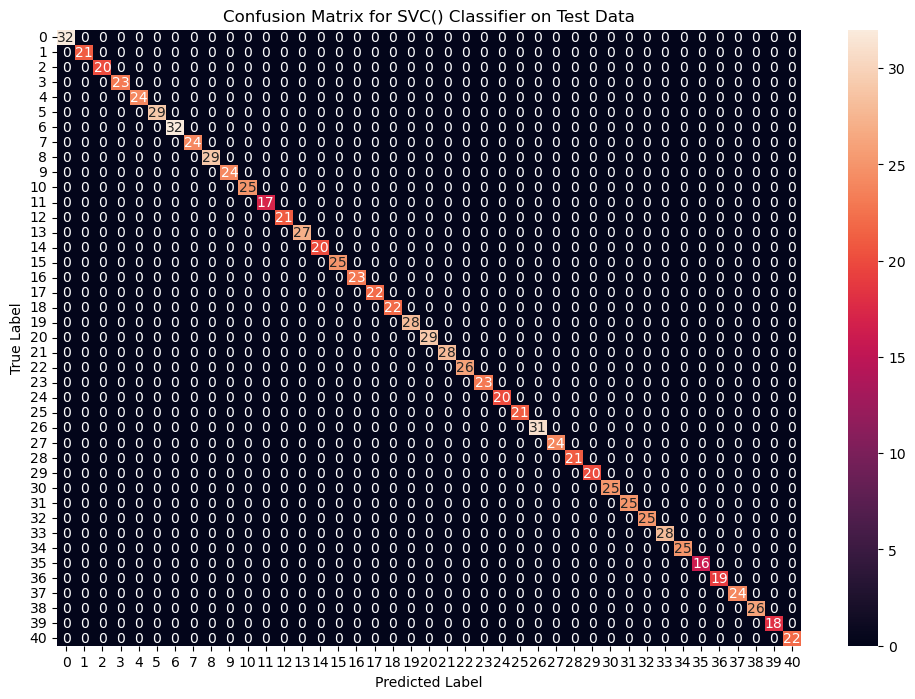

Accuracy on train data by GaussianNB() Classifier: 100.0
Accuracy on test data by GaussianNB() Classifier: 100.0


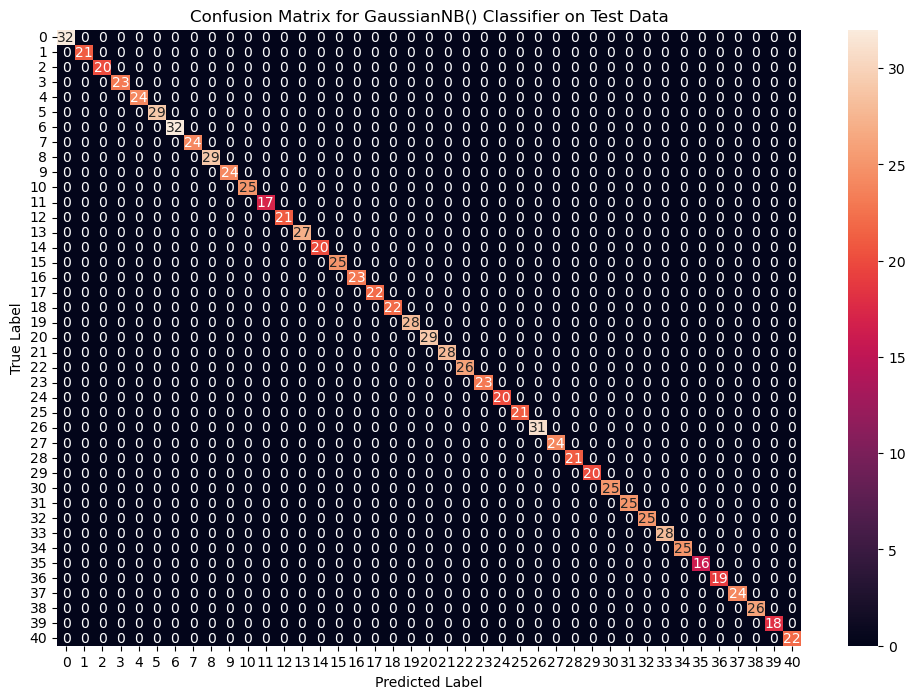

Accuracy on train data by RandomForestClassifier(random_state=18) Classifier: 100.0
Accuracy on test data by RandomForestClassifier(random_state=18) Classifier: 100.0


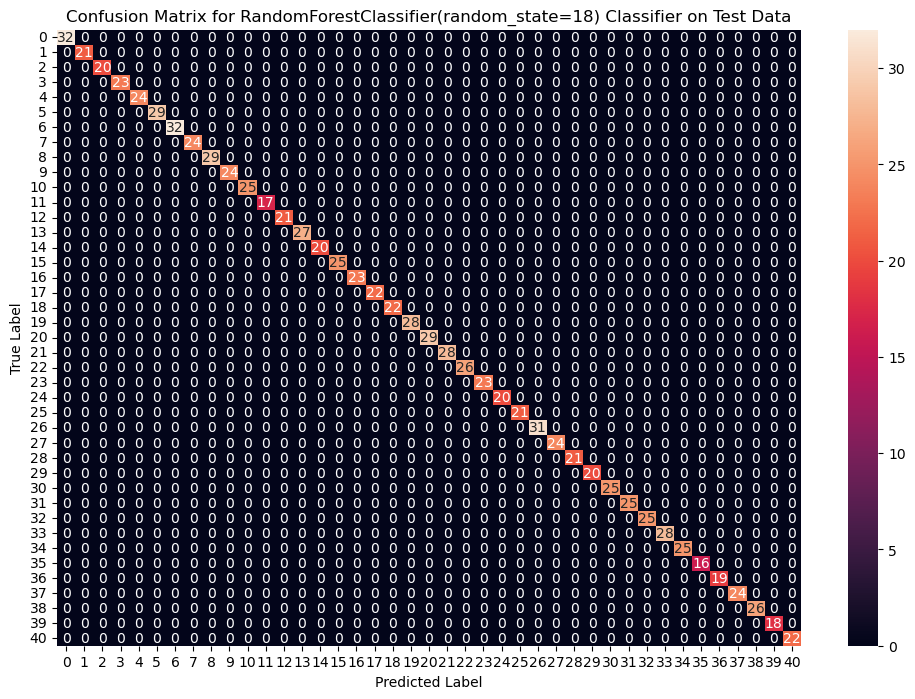

In [22]:
for model_name in models:
    # Training and testing model
    m = models[model_name]
    m.fit(X_train, y_train)
    pred = m.predict(X_test)

    print(f'Accuracy on train data by {m} Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}')

    print(f"Accuracy on test data by {m} Classifier: {accuracy_score(y_test, pred)*100}")

    cf_matrix = confusion_matrix(y_test, pred)
    plt.figure(figsize=(12,8))
    hm = sns.heatmap(cf_matrix, annot=True)
    plt.title(f'Confusion Matrix for {m} Classifier on Test Data')
    hm.set(xlabel="Predicted Label", ylabel="True Label")

    plt.show()

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


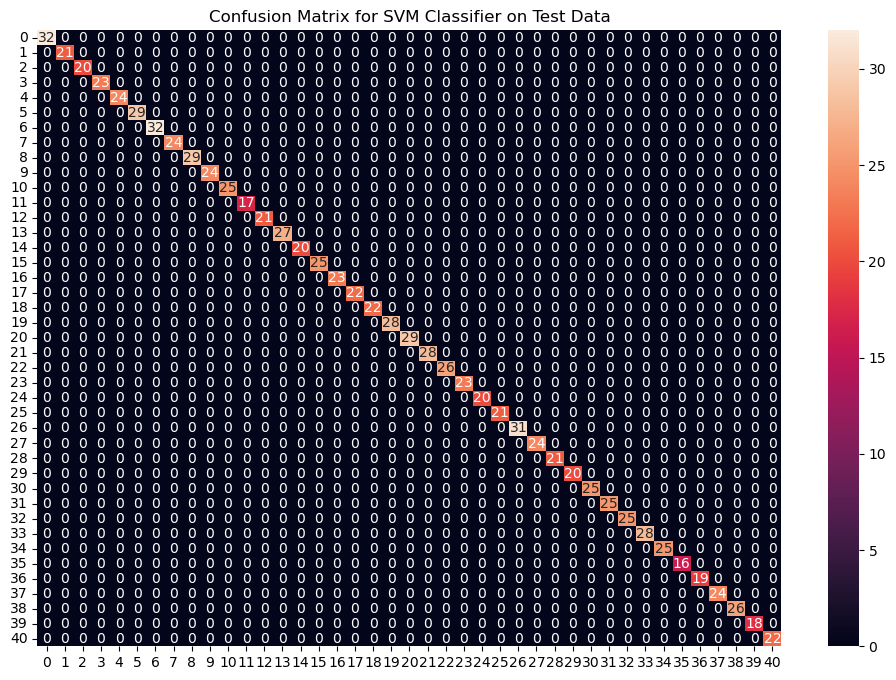

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


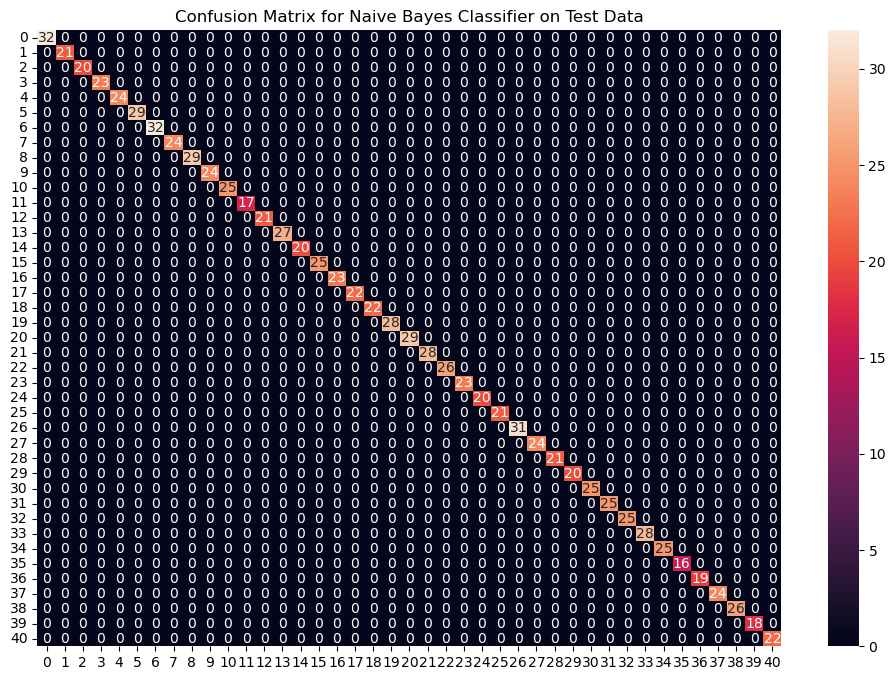

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


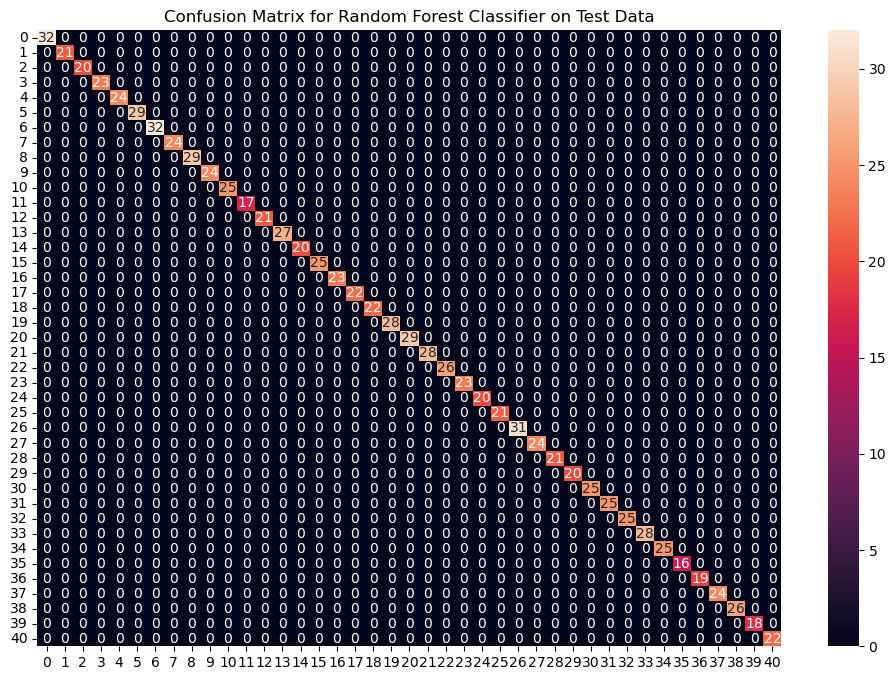

In [12]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, pred)*100}")
cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, pred)*100}")
cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, pred)*100}")

cf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()